<a href="https://colab.research.google.com/github/pyc970905/pythonBigData/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D2%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 션형 회귀

KNN을 활용하기 꺼려지는 상황

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [33]:
path = '/content/Fish.csv'
df = pd.read_csv(path)
df
perch_df = df[df['Species']=='Perch']
perch_df

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415
77,Perch,100.0,16.2,18.0,19.2,5.2224,3.3216
78,Perch,78.0,16.8,18.7,19.4,5.1992,3.1234
79,Perch,80.0,17.2,19.0,20.2,5.6358,3.0502
80,Perch,85.0,17.8,19.6,20.8,5.1376,3.0368
81,Perch,85.0,18.2,20.0,21.0,5.0820,2.7720


In [48]:
perch_length = perch_df['Length2'].to_numpy()
perch_weight = perch_df['Weight'].to_numpy()

In [49]:
print(perch_length)
print(perch_weight)

[ 8.4 13.7 15.  16.2 17.4 18.  18.7 19.  19.6 20.  21.  21.  21.  21.3
 22.  22.  22.  22.  22.  22.5 22.5 22.7 23.  23.5 24.  24.  24.6 25.
 25.6 26.5 27.3 27.5 27.5 27.5 28.  28.7 30.  32.8 34.5 35.  36.5 36.
 37.  37.  39.  39.  39.  40.  40.  40.  40.  42.  43.  43.  43.5 44. ]
[   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]


길이를 알고 있을 때 무게를 예축해 보자.

In [50]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight)

In [51]:
train_input.shape
# 독립변수는 2차원 배열로 되있어야 한다

(42,)

In [52]:
train_input = train_input.reshape(-1,1) # 독립변수 목록을 2차원 배열 구조로 변경
test_input = test_input.reshape(-1,1)
train_input.shape

(42, 1)

In [53]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit(train_input,train_target)
pval = kn.predict([[50]])
print("예측 값",pval)

예측 값 [990.]


In [54]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor(n_neighbors=3)
kn.fit(train_input,train_target)
pval = kn.predict([[50]])
print("예측 값",pval)

예측 값 [1000.]


In [55]:
import matplotlib.pyplot as plt

In [56]:
print(kn.kneighbors([[50]]))

(array([[6. , 6.5, 7. ]]), array([[ 4,  7, 33]]))


In [57]:
distances, indexes = kn.kneighbors([[1000]])

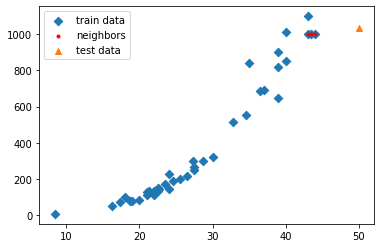

In [58]:
plt.scatter(train_input, train_target, label='train data',marker='D')
plt.scatter(train_input[indexes], train_target[indexes],label='neighbors', marker='.',color='red')
plt.scatter(50,1033,label='test data',marker='^')
plt.xlabel='length'
plt.ylabel='weight'
plt.legend()
plt.show()

In [59]:
pval = kn.predict([[1000]])
print("예측 값",pval)

예측 값 [1000.]


In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input,train_target)
p_val = lr.predict([[50],[100]])
print(p_val)

[1195.16225618 3041.11045406]


In [63]:
p_val2 = kn.predict([[50],[100]])
print(p_val2)

[1000. 1000.]


In [64]:
print("가중치(기울기): ",lr.coef_,'편향:',lr.intercept_)

가중치(기울기):  [36.91896396] 편향: -650.7859416881722


In [65]:
print(50*lr.coef_+lr.intercept_)
print(p_val[0])

[1195.16225618]
1195.1622561834893


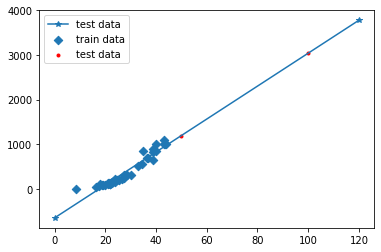

In [70]:
plt.scatter(train_input, train_target, label='train data',marker='D')
plt.scatter([50,100],p_val,label='test data', marker='.',color='red')
plt.plot([0,120],[0*lr.coef_+lr.intercept_,120*lr.coef_+lr.intercept_],label='test data',marker='*')
plt.xlabel='length'
plt.ylabel='weight'
plt.legend()
plt.show()

가상의 데이터를 만들어서 선형 회기를 해보자

y= 2x+3

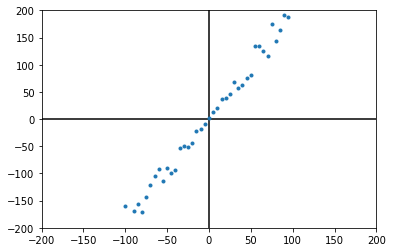

In [82]:
import numpy as np
input = [x for x in range(-100,100,5)]
target = [(2+np.random.uniform(-0.5,0.5))*x+(3+np.random.randint(-3,3)) for x in input]
plt.plot(input,target,'.')
plt.xlim(-200,200)
plt.ylim(-200,200)
plt.vlines(0,-200,200)
plt.hlines(0,-200,200)
plt.show()

In [110]:
input_data= np.array(input).reshape(-1,1)

In [111]:
input_data.shape

(50, 1)

In [112]:
target_data= np.array(target)

In [113]:
lr = LinearRegression()
lr.fit(input_data,target_data)
print(f'편향:{lr.coef_[0]:.2f} 기울기:{lr.intercept_:.2f}')

편향:32.73 기울기:22836.07


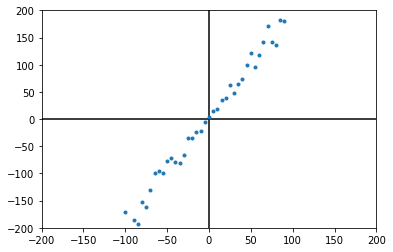

In [114]:
input = [x for x in range(-100,100,5)]
target = [(2+np.random.uniform(-0.5,0.5))*x+(3+np.random.randint(-3,3)) for x in input]
plt.plot(input,target,'.')
plt.plot([-200,200],[-200*lr.coef_+lr.intercept_,200*lr.coef_+lr.intercept_])
plt.xlim(-200,200)
plt.ylim(-200,200)
plt.vlines(0,-200,200)
plt.hlines(0,-200,200)
plt.show()

y=2x_1^2+3x_+5

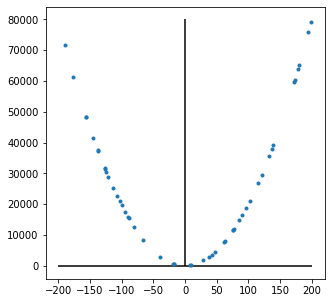

In [115]:
plt.figure(figsize=(5,5))
input = [np.random.randint(-200,200) for _ in range(50)]
target = [2*x*x+3*x+5 + np.random.randint(-10,10) for x in input]
plt.plot(input,target,'.')
plt.vlines(0,-200,80000)
plt.hlines(0,-200,200)
plt.show()

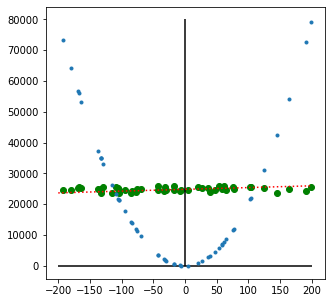

In [167]:
input_arr = np.array(input).reshape(-1,1)
lr = LinearRegression()
lr.fit(input_arr,target)
p_val = lr.predict(input_arr)
plt.figure(figsize=(5,5))
input = [np.random.randint(-200,200) for _ in range(50)]
target = [2*x*x+3*x+5 + np.random.randint(-10,10) for x in input]
plt.plot(input,target,'.')
plt.plot([-200,200],[-200*lr.coef_+lr.intercept_,200*lr.coef_+lr.intercept_],'r:')
plt.scatter(input,p_val,color='g')
plt.vlines(0,-200,80000)
plt.hlines(0,-200,200)
plt.show()

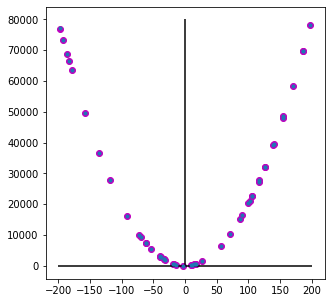

In [137]:
input_total = [[x,x*x] for x in input]
lr = LinearRegression()
lr.fit(input_total,target)
p_val2 = lr.predict(input_total)
plt.figure(figsize=(5,5))
plt.plot(input,target,'.')
plt.scatter(input,p_val2,color='m')
plt.vlines(0,-200,80000)
plt.hlines(0,-200,200)
plt.show()

In [139]:
print(train_input.shape)

(42, 1)


In [141]:
lr = LinearRegression()
lr.fit(train_input,train_target)
p_val = lr.predict([[2],[10],[50],[100]])
print('예측:',p_val)

예측: [-576.94801377 -281.59630211 1195.16225618 3041.11045406]


In [144]:
perch_length = perch_df['Length2'].to_numpy()
perch_weight = perch_df['Weight'].to_numpy()
pl2 = [[x,x*x] for x in perch_length ]
lr = LinearRegression()
lr.fit(pl2,perch_weight)

LinearRegression()

In [149]:
test2 = [[x, x*x] for x in range(0,100)] #특성공학
p_val2 = lr.predict(test2)

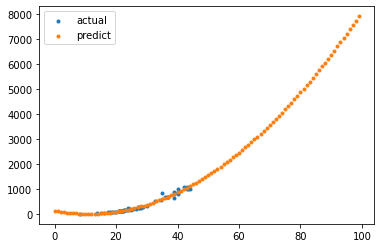

In [151]:
plt.scatter(perch_length,perch_weight,label='actual',marker='.')
plt.scatter(range(0,100),p_val2,label='predict',marker='.')
plt.legend()
plt.show()  

In [152]:
print(lr.coef_,lr.intercept_)

[-22.4189282    1.02094922] 131.6453196989612


-22.41 * length + 1.02 length*length + 131.65

In [153]:
perch_full = perch_df[['Length2','Height','Width']].to_numpy()

In [ ]:
print(perch_full)

In [155]:
train_input, test_input , train_target, test_target = train_test_split(perch_full,perch_weight)

In [170]:
from sklearn.preprocessing import PolynomialFeatures

In [162]:
poly = PolynomialFeatures(degree=3)
poly.fit([[2,3]])
print(poly.transform([[2,3]])) #degree = n일때 n차방정식에서 나올수있는 모든항의 값들

[[ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [164]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]])) # 편향을 제외하고

[[2. 3. 4. 6. 9.]]


In [165]:
poly = PolynomialFeatures(degree=3,include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[ 2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [166]:
print(poly.get_feature_names())

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [173]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[1,2,3]])
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 9)


In [175]:
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.989090982567794
0.9850795666507859


In [176]:
lr = LinearRegression()
lr.fit(train_input,train_target)
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.9456267355313498
0.9076437272840827


In [181]:
poly5 = PolynomialFeatures(include_bias=False,degree=5)
poly5.fit([[1,2,3]])
train_poly5 = poly5.transform(train_input)
test_poly5 = poly5.transform(test_input)
print(train_poly5.shape)

(42, 55)


In [182]:
lr = LinearRegression()
lr.fit(train_poly5,train_target)
print(lr.score(train_poly5,train_target))
print(lr.score(test_poly5,test_target))

0.9999999999999124
-204.31112398958692


In [183]:
from sklearn.preprocessing import StandardScaler

In [189]:
ss = StandardScaler()
ss.fit([[1,2],[1,2],[2,3],[3,4],[3,1]])
print(ss.transform([[1,2],[1,2],[2,3],[3,4],[3,1]]))

[[-1.11803399 -0.39223227]
 [-1.11803399 -0.39223227]
 [ 0.          0.58834841]
 [ 1.11803399  1.56892908]
 [ 1.11803399 -1.37281295]]


In [186]:
a = np.array([1,1,2,3,3])
print(a.mean(),a.std())


2.0 0.8944271909999159


In [188]:
print((a-a.mean())/a.std())

[-1.11803399 -1.11803399  0.          1.11803399  1.11803399]


In [192]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)


In [193]:
lr = LinearRegression()
lr.fit(train_scaled,train_target)
print(lr.coef_)

[ -129.05869074  -116.23527209    62.69956163   140.73601992
   914.27898374  -606.94588307   795.73568275 -2115.07945253
  1430.48907503]


In [198]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.coef_)

[-23.20620704 -13.21319956 -29.88098214  79.2935287   83.38641694
  62.94707691  85.55628341  65.37032082  49.44960837]


In [200]:
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9855682334201751
0.981888342155695


In [229]:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso.fit(train_scaled,train_target)
print(Lasso.coef_)

[-79.85867594  -0.          -0.         138.62837647 123.71770634
   0.         102.70345832   0.          75.5093904 ]


In [202]:
print(Lasso.score(train_scaled,train_target))
print(Lasso.score(test_scaled,test_target))

0.9864002068040717
0.9821492883003013


In [209]:
train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100]

for alpha in alpha_list :
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled,train_target)
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))
print(train_score,test_score)

[0.988760766074486, 0.988013285781868, 0.9876526314350856, 0.9855682334201751, 0.9765532281836197, 0.930305237510985] [0.9874286683478933, 0.9893209669397584, 0.9888254047457694, 0.981888342155695, 0.9625511486370749, 0.8897488311431192]


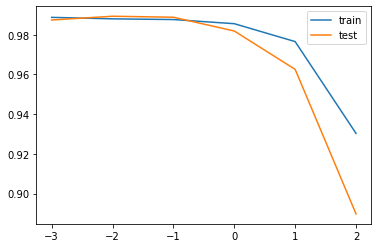

In [210]:
plt.plot(np.log10(alpha_list),train_score,label='train')
plt.plot(np.log10(alpha_list),test_score,label = 'test')
plt.legend()
plt.show()

In [211]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9876526314350856
0.9888254047457694


In [231]:
# 라쏘
train_score=[]
test_score=[]

alpha_list =[0.001, 0.01,  0.1,  1,  10, 100]
for alpha in alpha_list : 
  Lasso = Lasso(alpha=alpha , max_iter = 1000000)   #max_iter = 1000000 정도수치써야 이상한 글 안뜸
  Lasso.fit(train_scaled  , train_target )
  train_score.append(Lasso.score(train_scaled, train_target))
  test_score.append(Lasso.score(test_scaled, test_target))
print(train_score , test_score)

TypeError: ignored

#경사하강법

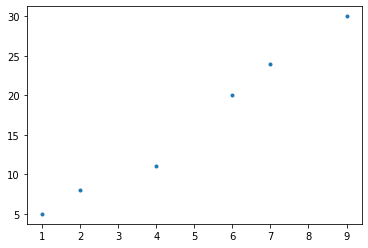

In [233]:
ex =[2,4,7,1,9,6]
ex_ys = [8,11,24,5,30,20]
ex_xs= [[x] for x in ex]
plt.plot(ex,ex_ys,'.')
plt.show()

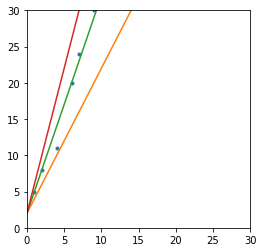

In [234]:
plt.figure(figsize=(4,4))
plt.plot(ex,ex_ys,'.')
plt.plot([0,30],[2*0+2,2*30+2],label='y=2x+2')
plt.plot([0,30],[3*0+2,3*30+2],label='y=3x+2')
plt.plot([0,30],[4*0+2,4*30+2],label='y=4x+2')
plt.xlim(0,30)
plt.ylim(0,30)
plt.show()

In [240]:
def mae(yp,y):
  return np.mean(np.abs(yp-y))

def mse(yp,y):
  return np.mean(sum(yp-y)**2)

In [241]:
yp=np.array([1,2,9])
ya=np.array([2,3,4])
print(mae(yp,ya),mse(yp,ya))

2.3333333333333335 9.0


In [247]:
ex_arr = np.array(ex)
ey_arr = np.array(ex_ys)
mses=[]
for w in np.arange(-2,5,0.1):
  yp = w*ex_arr+2
  mses.append(mse(yp,ey_arr))

print(mses)
print(np.argmin(mses))
print(mses[50])

[20736.0, 19909.21, 19099.239999999998, 18306.089999999997, 17529.760000000002, 16770.25, 16027.559999999998, 15301.689999999993, 14592.639999999996, 13900.409999999994, 13224.999999999993, 12566.409999999996, 11924.639999999994, 11299.68999999999, 10691.559999999996, 10100.249999999995, 9525.759999999991, 8968.089999999993, 8427.239999999993, 7903.209999999994, 7395.99999999999, 6905.609999999992, 6432.039999999992, 5975.289999999991, 5535.359999999992, 5112.249999999992, 4705.959999999992, 4316.489999999991, 3943.8399999999906, 3588.0099999999907, 3248.999999999991, 2926.8099999999918, 2621.4399999999914, 2332.889999999992, 2061.159999999992, 1806.2499999999927, 1568.1599999999928, 1346.8899999999928, 1142.4399999999935, 954.8099999999938, 783.9999999999942, 630.0099999999952, 492.8399999999951, 372.48999999999523, 268.9599999999962, 182.24999999999721, 112.35999999999754, 59.28999999999794, 23.039999999998813, 3.6099999999995696, 1.0000000000002611, 15.210000000001125, 46.2400000000

TypeError: ignored

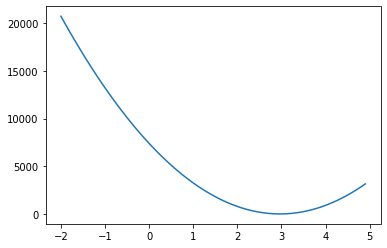

In [251]:
plt.plot(np.arange(-2,5,0.1),mses)
plt.xlabel(label='w')
plt.ylabel('mse')
plt.show()

In [286]:
def gradient(ys,xs,w,b):
  yp = w*xs+b
  error = ys-yp
  wd = -(2/len(xs))*sum(xs*error)
  bd = -(2/len(xs))*sum(error)
  return wd,bd


In [287]:
def gradient_descent(xs,ys,lr=0.001,epochs=1000):
  wphl = [] #학습과정에서의 가중치와 편향을 보관
  wp = np.random.uniform(-1,1)
  bp = np.random.uniform(-1,1)
  for epoch in range(epochs):
    wd,bd = gradient(ys,xs,wp,bp)
    wp = wp - (wd*lr)
    bp = bp - (bd*lr)
    wphl.append([wp,bp])
    return wp,bp,wphl

In [288]:
wp , bp, wphl = gradient_descent(ex_arr,ey_arr)
for epoch, (wb,bd) in enumerate(wphl):
  print(f'epoch:{epoch:04d} w:{wb:10.2f} b:{bd:10.2f}')

epoch:0000 w:      0.04 b:     -0.81


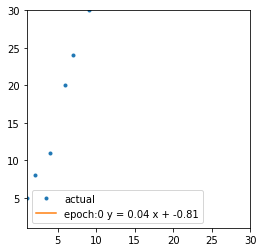

In [289]:
from numpy.ma.extras import MAxisConcatenator
min_val = min(min(ex_arr),min(ey_arr))
max_val = max(max(ex_arr),max(ey_arr))
for epoch, (wd,bd) in enumerate(wphl):
  plt.figure(figsize=(4,4))
  sx = min_val
  sy = wb*sx+bd
  ex =max_val
  ey =wb*ex+bd
  plt.plot(ex_arr,ey_arr,'.',label='actual')
  plt.plot([sx,ex],[sy,ey],label=f'epoch:{epoch} y = {wb:.2f} x + {bd:.2f}')
  plt.xlim(min_val,max_val)
  plt.ylim(min_val,max_val)
  plt.legend()
  plt.show()